In [50]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv('sf-crime/train.csv')

# Describing The Data

In [52]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


<br><p>There are no null values in the dataset. Only the cooridinates are numeric. Dates are object type</p>

In [54]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


<br><p>The max values for X & Y are somewhere near the North Pole</p>

In [55]:
crime_counts = data.groupby('Category')['Dates'].count()
print(crime_counts)

Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

<br><p>Wide range of values. Larceny/Theft is at the top of the list</p>

In [56]:
#Verify that our dates are good
print(min(data.Dates))
print(max(data.Dates))
#All dates are viable

2003-01-06 00:01:00
2015-05-13 23:53:00


# Wrangling The Data

In [71]:
#Create column with just the year
data['Year'] = pd.to_datetime(data['Dates'], format="%Y-%m-%d %H:%M:%S").dt.year

In [58]:
#Get the ordinal value of the day of the week
data['Ordinal Day'] = (data['DayOfWeek'].map(lambda x: list(calendar.day_abbr).index(x[:3]) +1) % 7)

In [59]:
data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Ordinal Day
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,3
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,3
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,3
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,3
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,3
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,3
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,3
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,3
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,2015,3
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,2015,3


In [60]:
#Replace extreme Latitudes & Longitudes with NaNs
data[data['X']==-120.5]=np.NaN
data[data['Y']==-90]=np.NaN

# Analyze The Data

In [61]:
# Percentage of no resolutions by district
d = data.groupby(['PdDistrict'])
dataWhereResolutionIsNone = data[data['Resolution'] == 'NONE']
e = dataWhereResolutionIsNone.groupby(['PdDistrict'])
print(str(e.count()['X'] / d.count()['X'] * 100))

PdDistrict
BAYVIEW       57.906332
CENTRAL       70.660582
INGLESIDE     64.745500
MISSION       52.587422
NORTHERN      66.722389
PARK          62.649307
RICHMOND      72.392814
SOUTHERN      59.754794
TARAVAL       68.631845
TENDERLOIN    33.854561
Name: X, dtype: float64


In [62]:
# Percentage of Non-Criminal activities by district
d = data.groupby(['PdDistrict'])
dataWhereResolutionIsNone = data[data['Category'] == 'NON-CRIMINAL']
e = dataWhereResolutionIsNone.groupby(['PdDistrict'])
print(str(e.count()['X'] / d.count()['X'] * 100))

PdDistrict
BAYVIEW        6.820469
CENTRAL       12.802060
INGLESIDE      8.692178
MISSION       10.317996
NORTHERN       9.726074
PARK          12.015575
RICHMOND      12.707402
SOUTHERN      12.562510
TARAVAL       10.548543
TENDERLOIN     9.124141
Name: X, dtype: float64


In [63]:
# Where are the most calls dispatched
print(data['Address'].mode())
print(f"{len(data[data['Address'] == '800 Block of BRYANT ST'])} crimes over the 12 year period.")
print(f"{len(data[data['Address'] == '800 Block of BRYANT ST'])/(12*8760):.2f} crimes per hour")

0    800 Block of BRYANT ST
dtype: object
26533 crimes over the 12 year period.
0.25 crimes per hour


# Visualize The Data

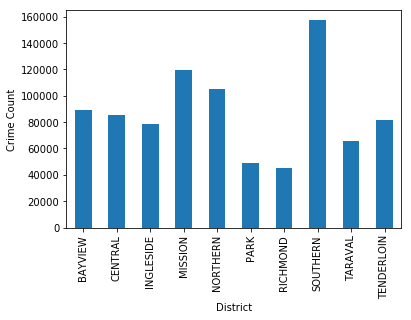

In [64]:
%matplotlib inline
# show the crimes by each district
crimes_by_district=data.groupby(["PdDistrict"]).count()['Dates'].plot.bar()
crimes_by_district.set_xlabel("District")
crimes_by_district.set_ylabel("Crime Count")

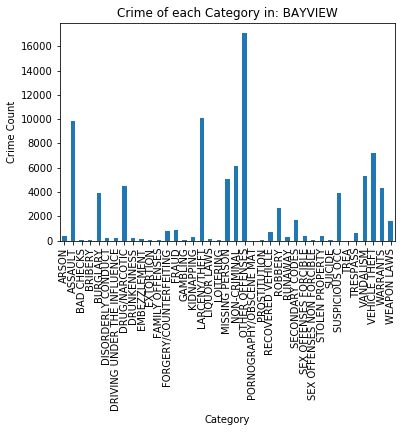

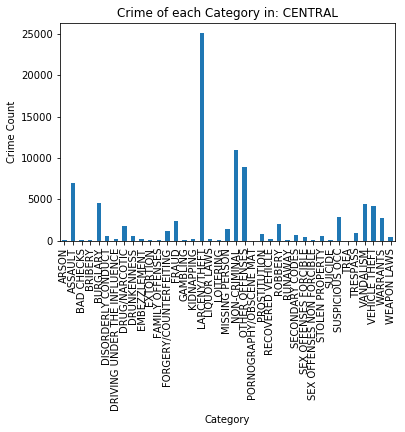

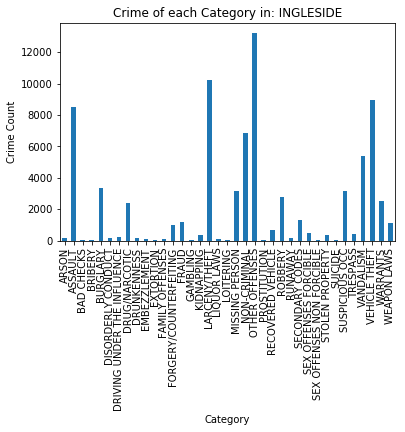

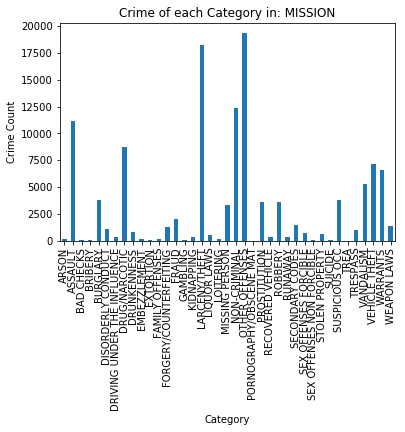

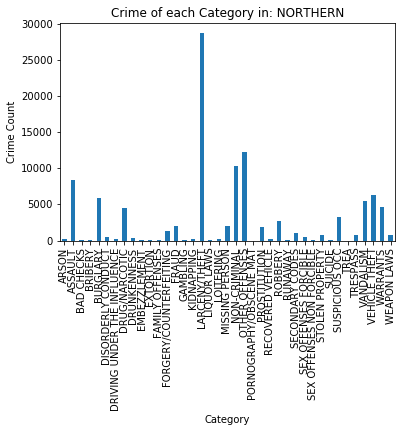

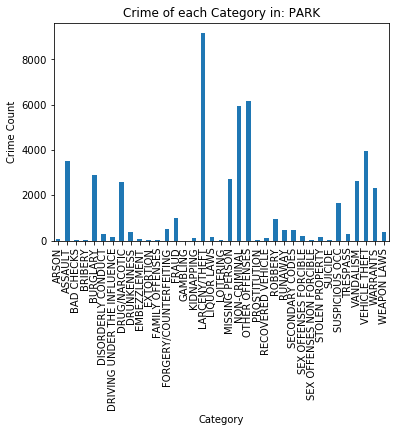

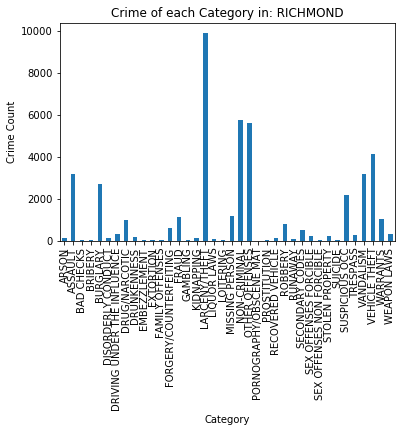

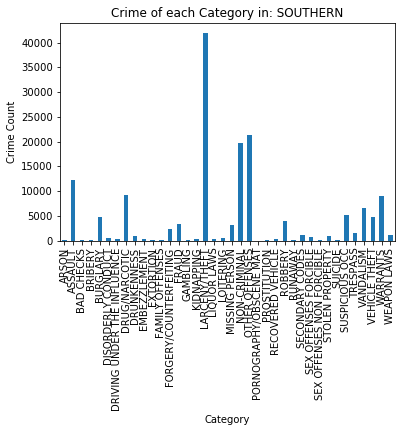

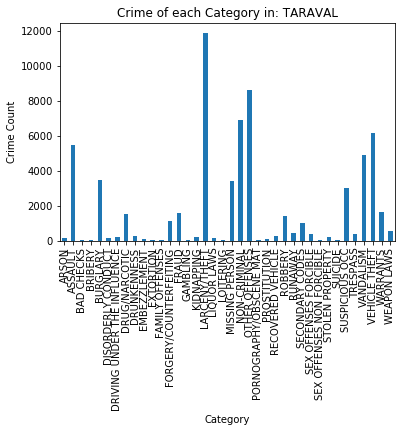

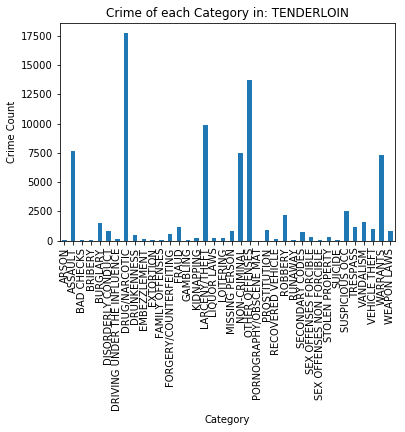

In [65]:
%matplotlib inline
#Crime counts by crime for each district
grouped_districts=data.groupby(["PdDistrict"])
for adist,distgroup in grouped_districts:
    crime_plot = distgroup.groupby(["Category"]).count()['Dates'].plot.bar()
    ttitle = "Crime of each Category in: {}".format(adist)
    props={'title': ttitle, 'xlabel':'Category','ylabel':'Crime Count'}
    crime_plot.set(**props)
    plt.show()

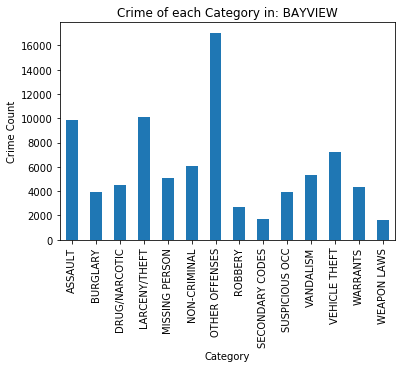

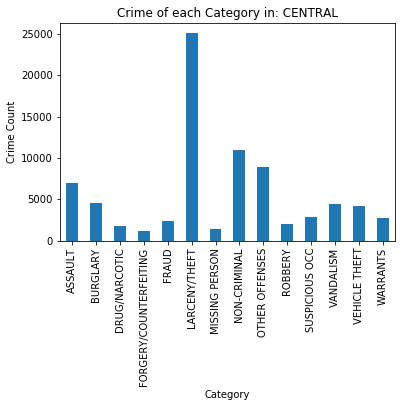

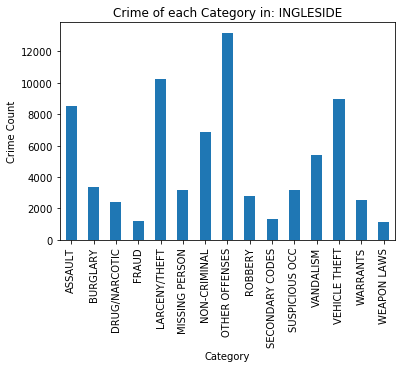

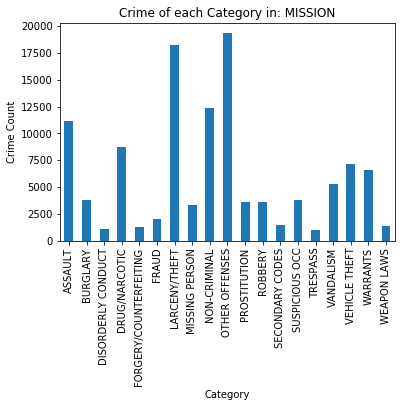

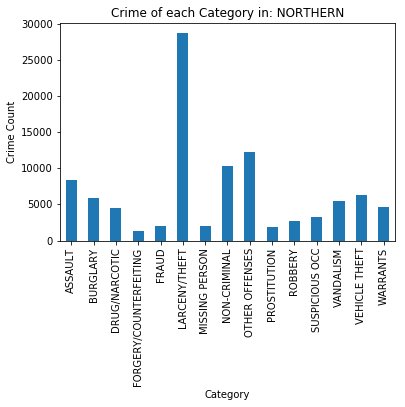

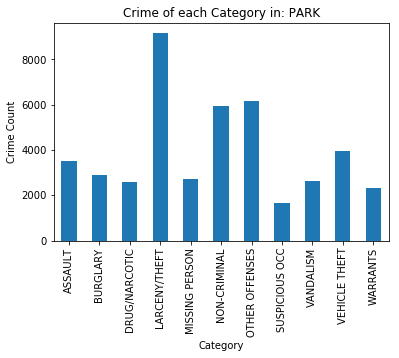

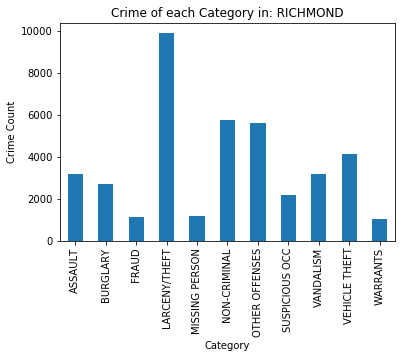

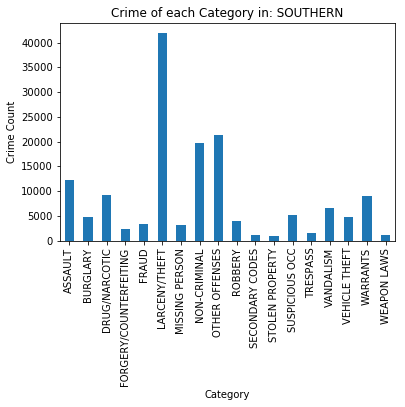

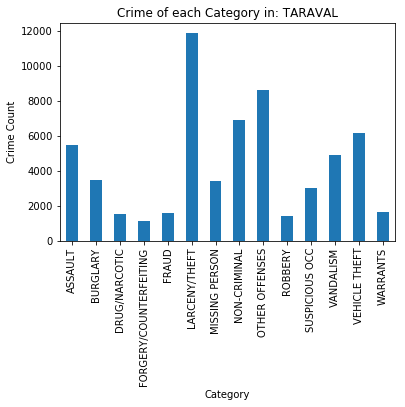

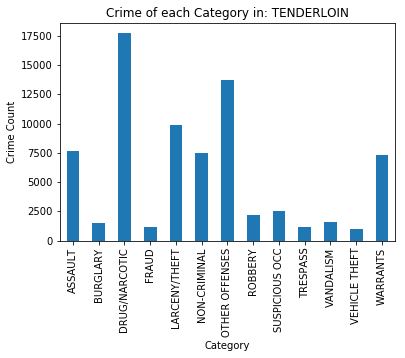

In [66]:
%matplotlib inline
# Refine crime counts by category for each district to those with over 1000 
grouped_districts=data.groupby(["PdDistrict"])
for adist,distgroup in grouped_districts:
    crime_data = distgroup.groupby(["Category"]).count()['Dates']
    for ind,val in crime_data.iteritems():
        if(val<1000):
            crime_data=crime_data.drop(ind)
    crime_plot=crime_data.plot.bar()
    ttitle = "Crime of each Category in: {}".format(adist)
    props={'title': ttitle, 'xlabel':'Category','ylabel':'Crime Count'}
    crime_plot.set(**props)
    plt.show()

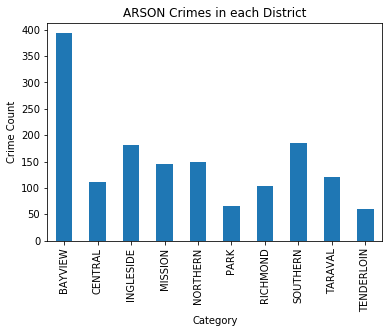

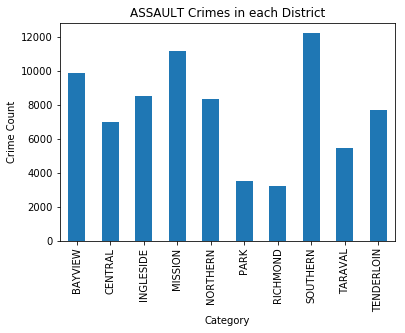

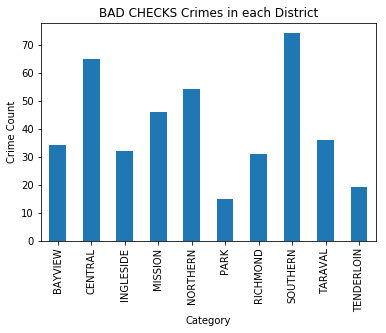

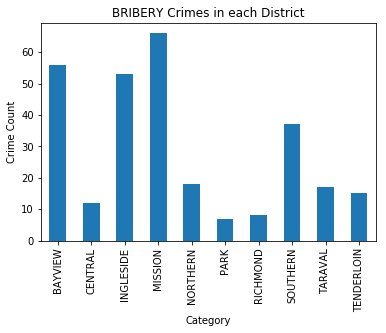

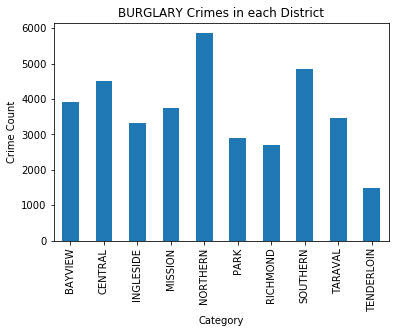

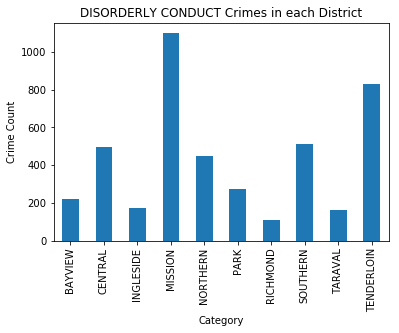

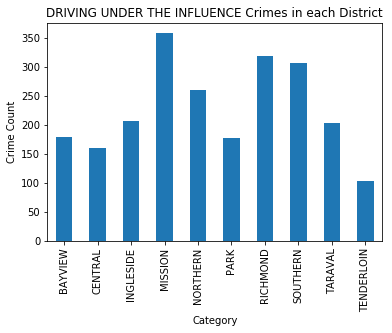

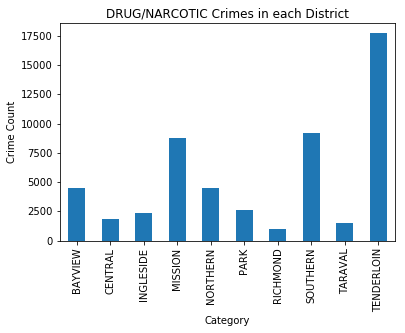

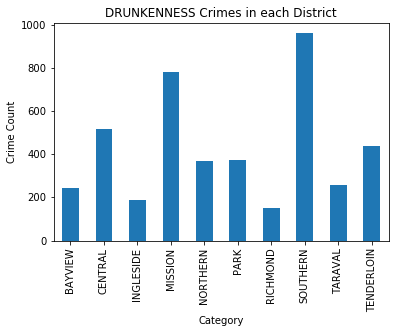

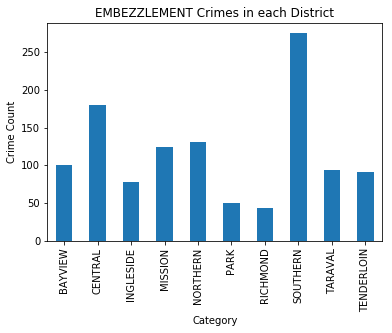

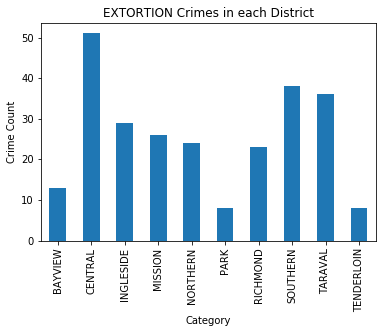

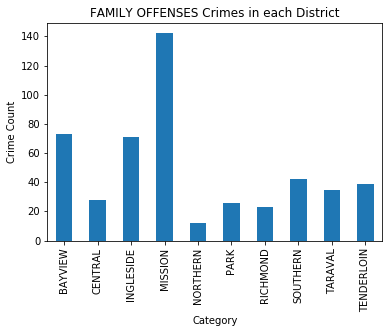

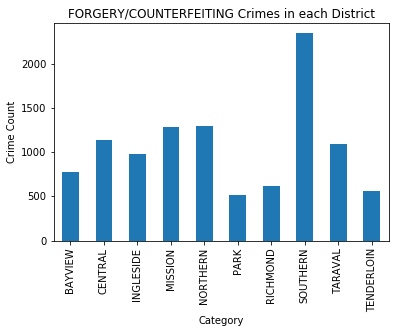

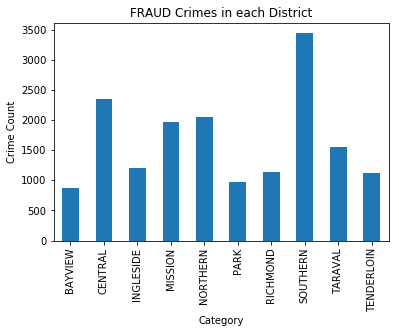

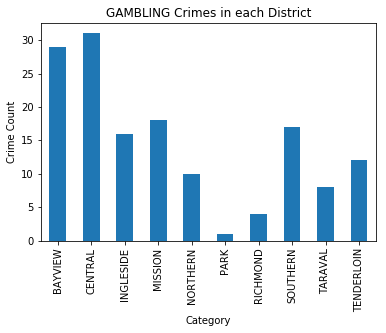

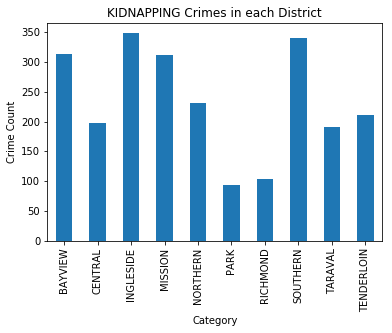

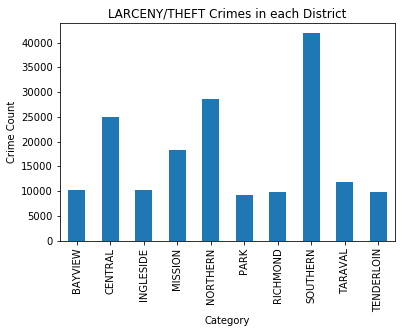

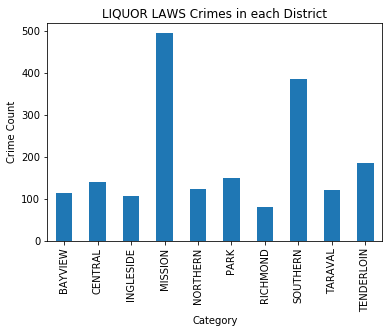

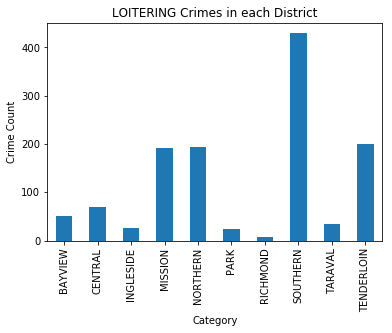

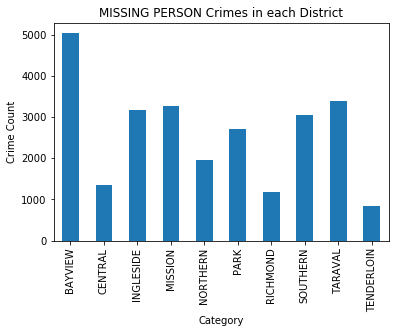

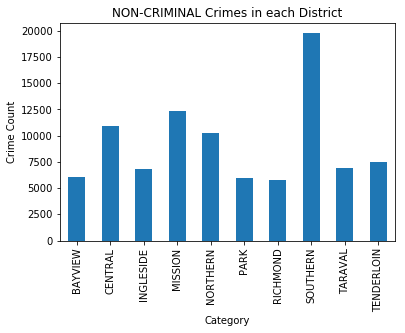

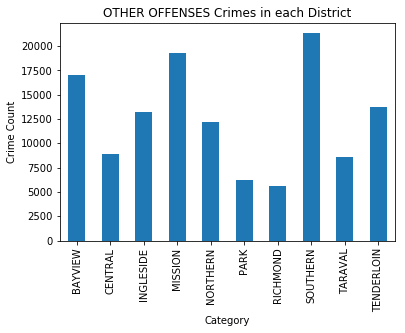

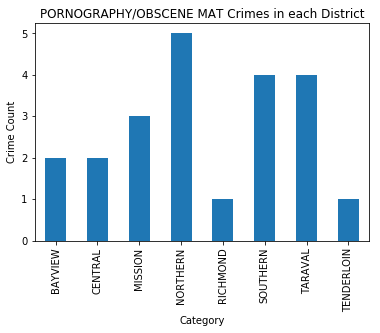

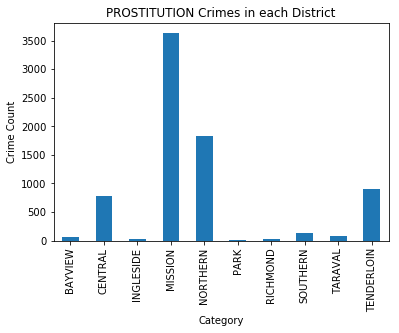

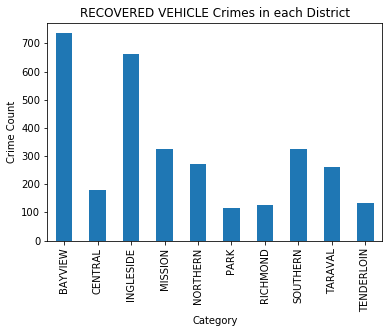

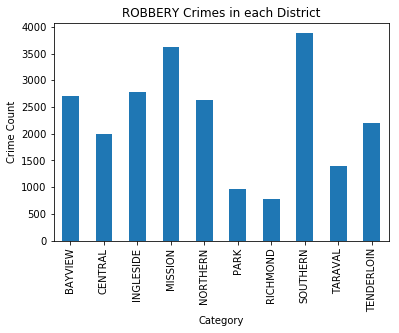

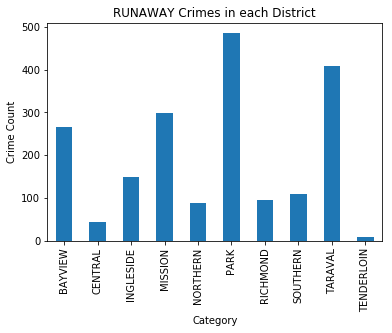

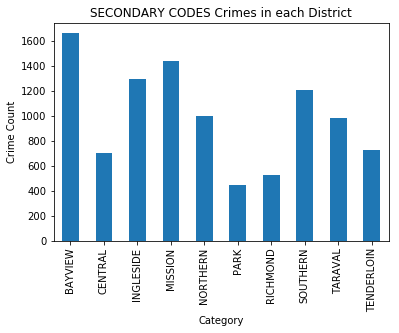

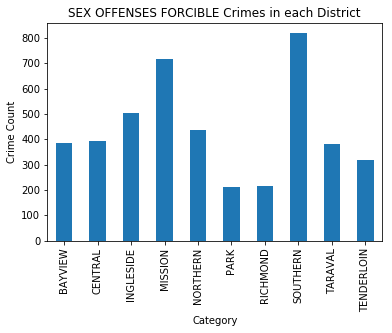

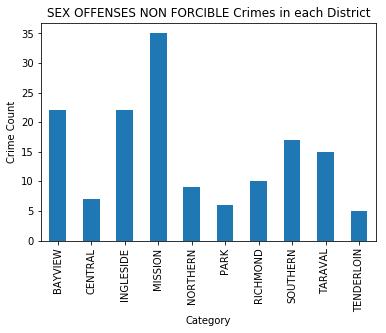

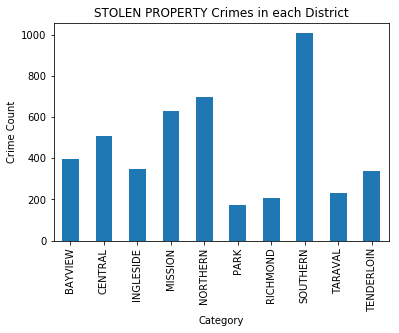

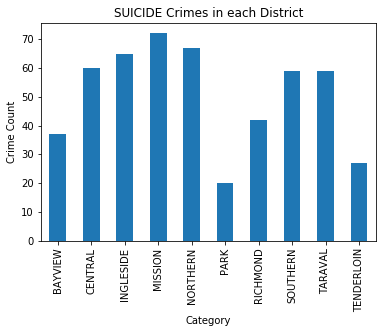

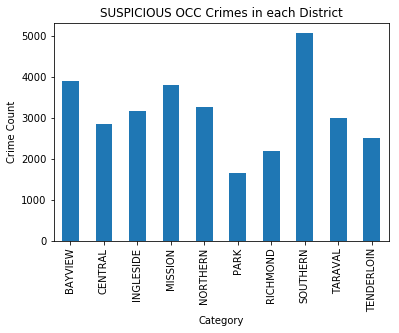

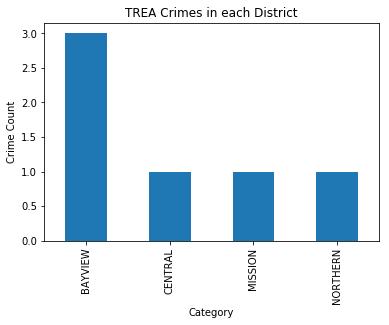

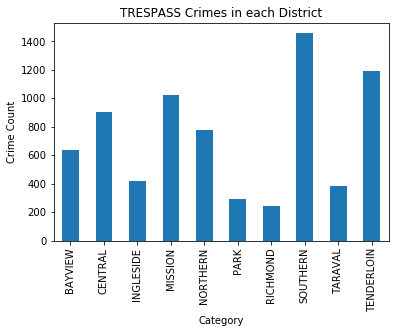

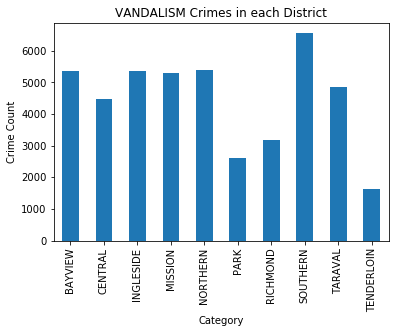

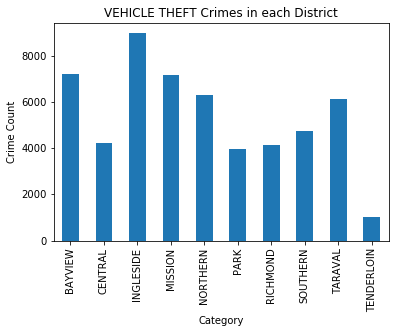

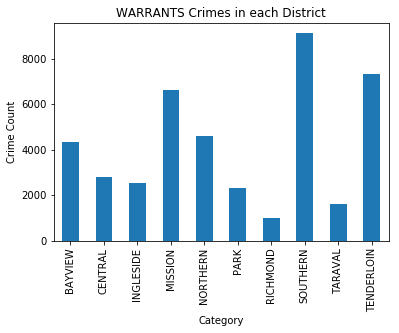

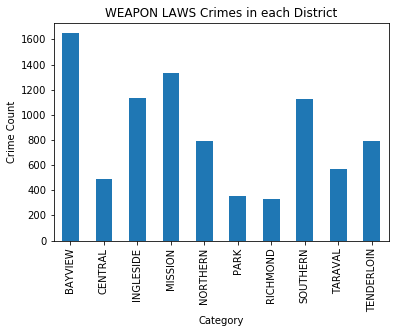

In [67]:
%matplotlib inline
# crime counts in each district by crimes
grouped_districts=data.groupby(["Category"])
for adist,distgroup in grouped_districts:
    crime_plot = distgroup.groupby(["PdDistrict"]).count()['Dates'].plot.bar()
    ttitle = "{} Crimes in each District".format(adist)
    props={'title': ttitle, 'xlabel':'Category','ylabel':'Crime Count'}
    crime_plot.set(**props)
    plt.show()

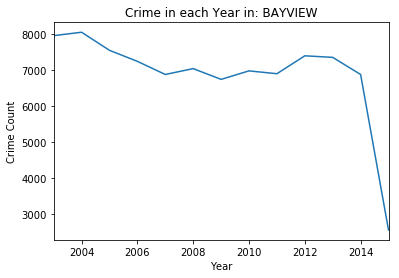

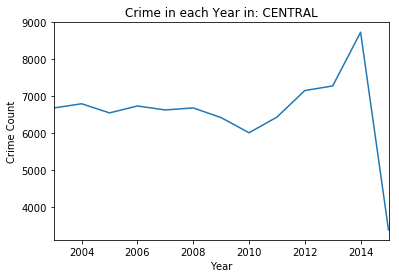

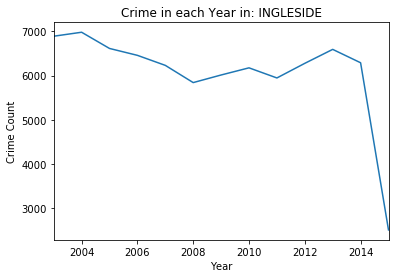

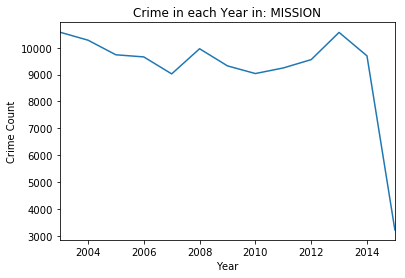

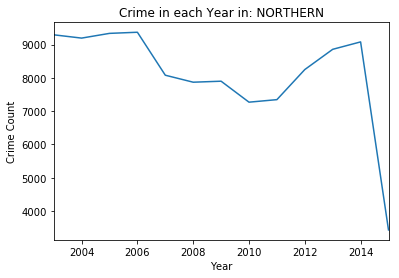

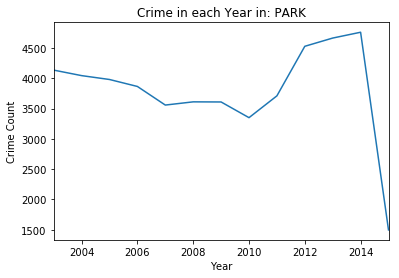

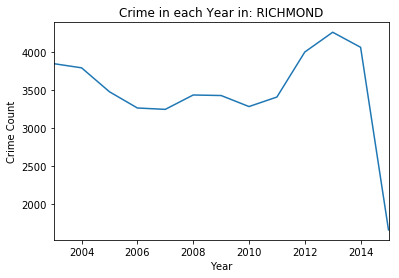

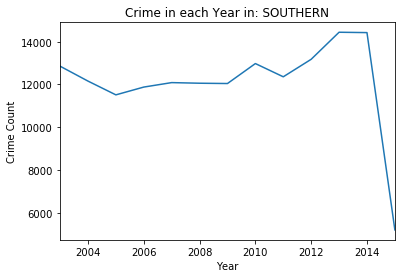

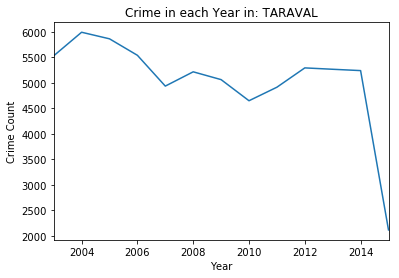

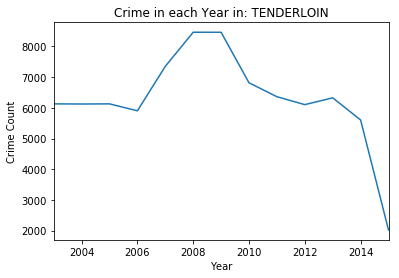

In [72]:
%matplotlib inline
# Crime counts per year by district
grouped_districts=data.groupby(["PdDistrict"])
for adist,distgroup in grouped_districts:
    crime_data = distgroup.groupby(["Year"]).count()['Dates']
    crime_plot=crime_data.plot.line()
    ttitle = "Crime in each Year in: {}".format(adist)
    props={'title': ttitle, 'xlabel':'Year','ylabel':'Crime Count'}
    crime_plot.set(**props)
    plt.show()

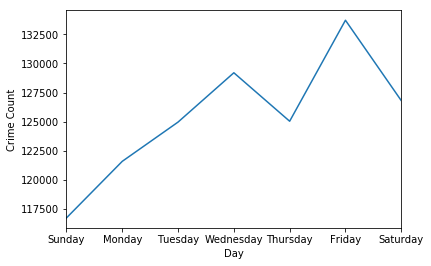

In [73]:
%matplotlib inline
#Crime counts by day of the week
test=data.groupby(["Ordinal Day"]).count()['Dates'].plot.line()
test.set_xlabel("Day")
test.set_ylabel("Crime Count")
labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']
test.set_xticklabels(labels)
plt.show()

# Modern Art

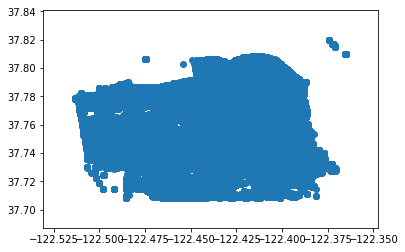

In [74]:
# Lat against Long just for fun
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.scatter(data['X'],data['Y'])